In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm

In [2]:
data = pd.read_csv("D:\\hack\\MLProj\\Weather.csv - Dataset.csv")

In [3]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   @dropdown  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 24 columns]

In [4]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  @dropdown  
count  89572.000000  86102.000000  143693.000000  141851.00000        0.0  
mean       4.447461      4.509930      16.990631      21.68339        NaN  
std        2.887159      2.720357       6.488753       6.93665        NaN  
min        0.000000      0.000000      -7.200000      -5.40000        NaN  
25%        1.000000      2.000000      12.300000      16.60000        NaN  
50%        5.000000      5.000000      16.700000      21.10000        NaN  
75%        7.000000      7.000000      21.600000      26.40000        NaN  
max        9.000000      9.000000      40.200000      46.70000        NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.isnull().sum()

Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@dropdown        145460
dtype: int64

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

<Axes: >

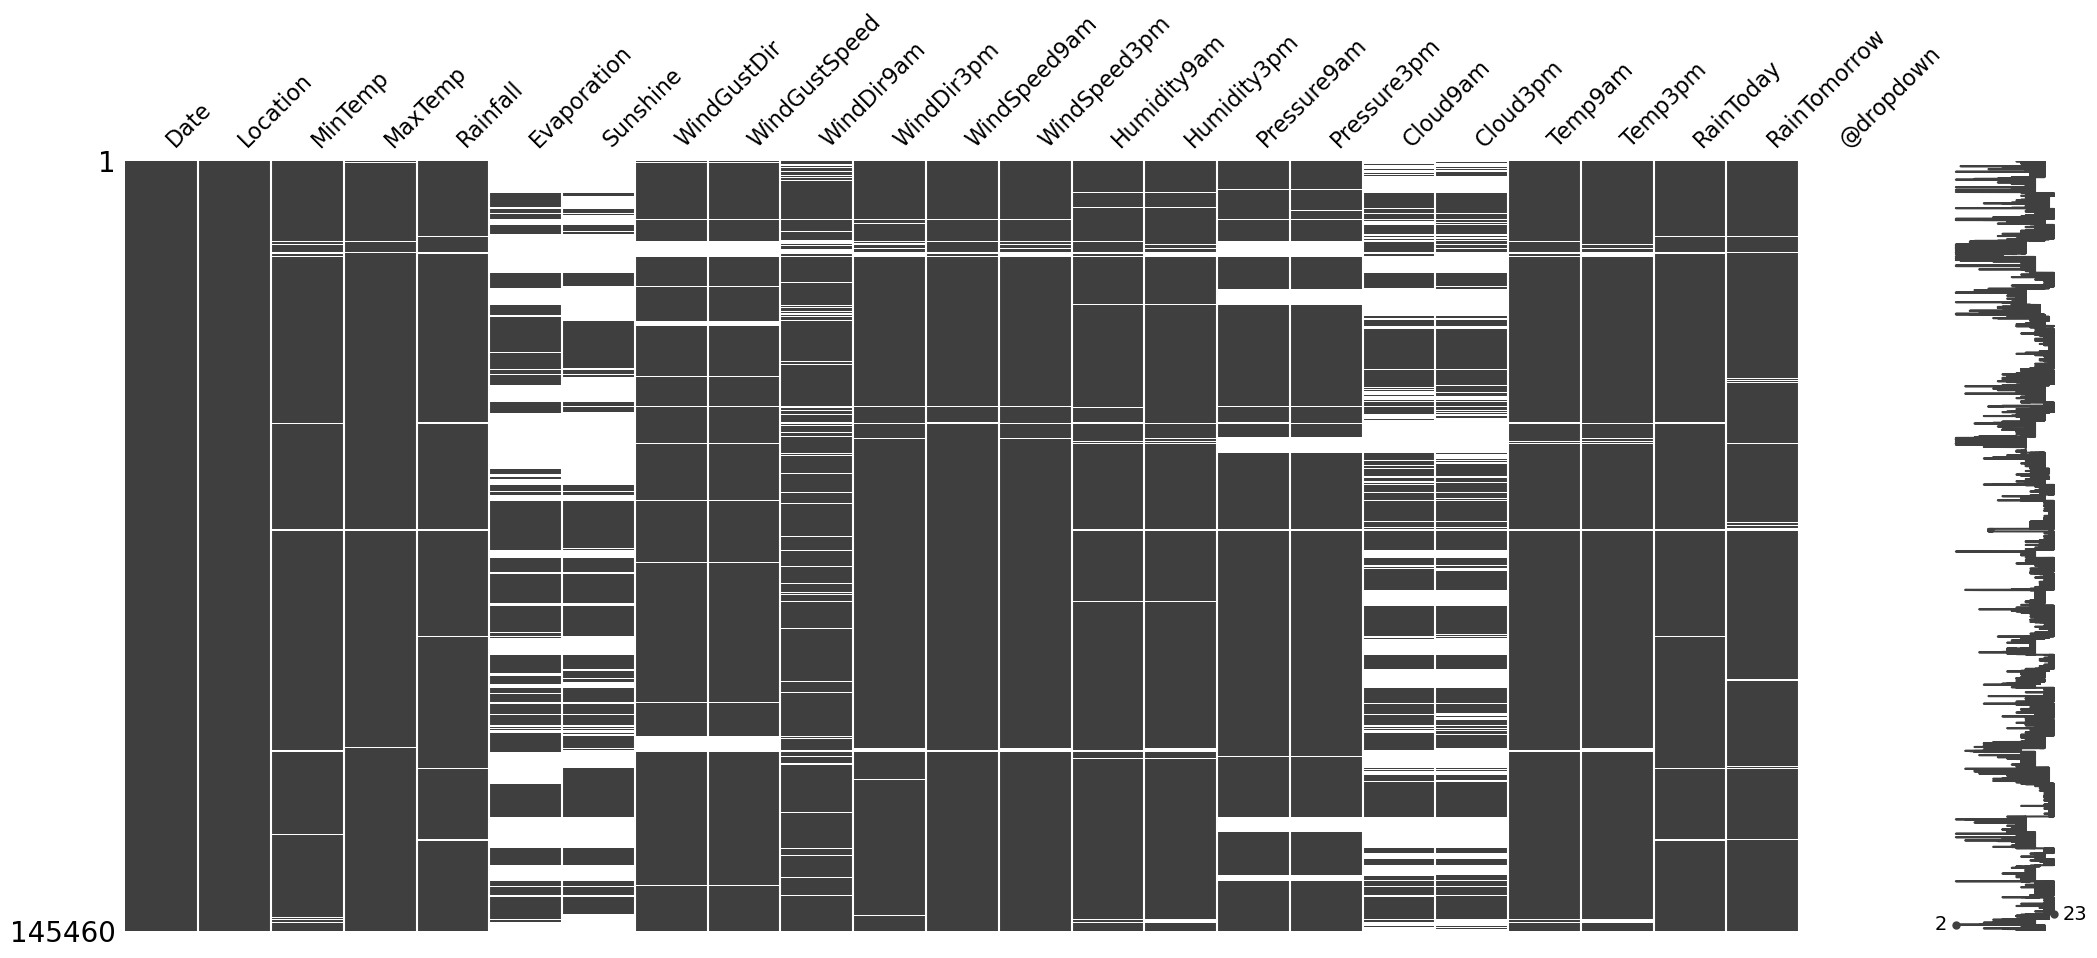

In [9]:
msno.matrix(data)

In [10]:
#separating categorical and numerical values
cat_data = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
#droping columns with a lot of missing values as seen from matrix above
data.drop(columns = ['Evaporation','Sunshine','Cloud9am','Cloud3pm','@dropdown'],axis = 1, inplace = True)
#removing cat columns from data as already stored in cat_data
data.drop(columns = ['RainToday','WindGustDir','WindDir9am','WindDir3pm'], axis = 1, inplace = True)

<Axes: >

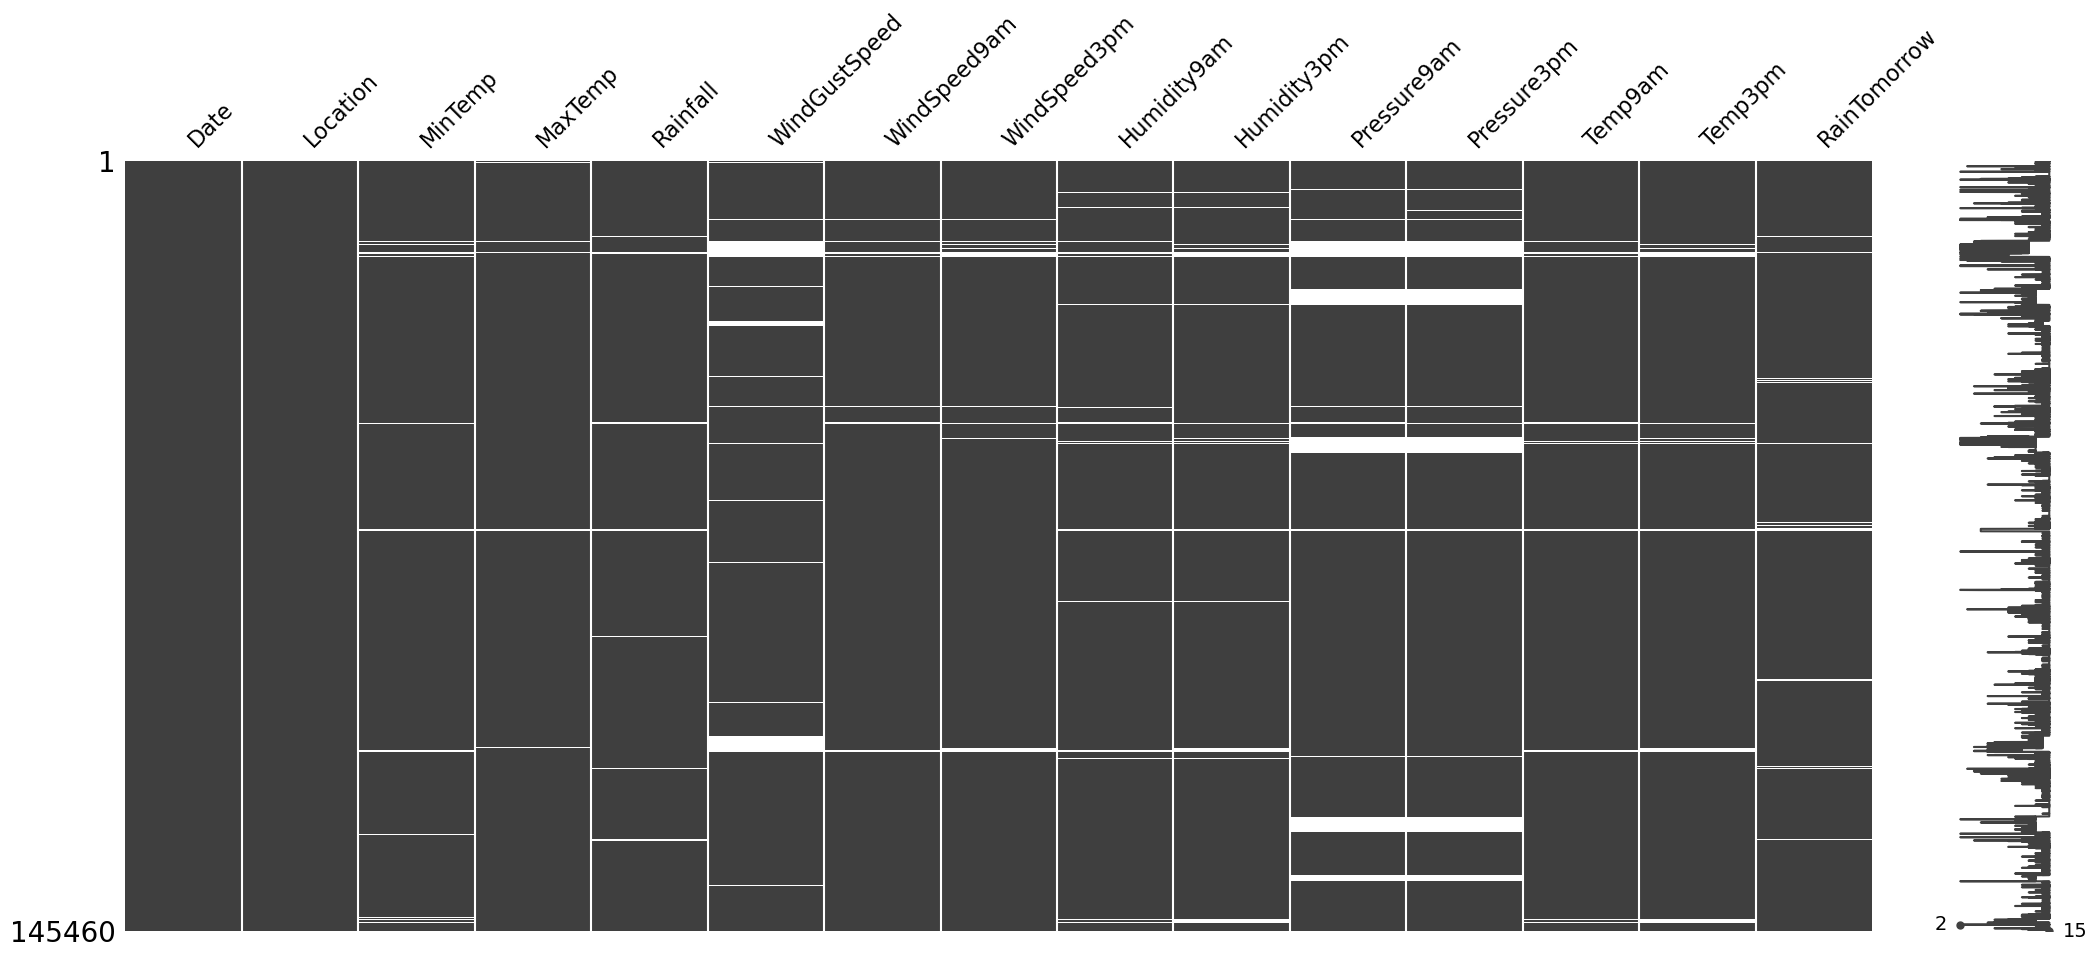

In [11]:
msno.matrix(data)

In [12]:
#filling missing data of numeric variables with mean
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

<Axes: >

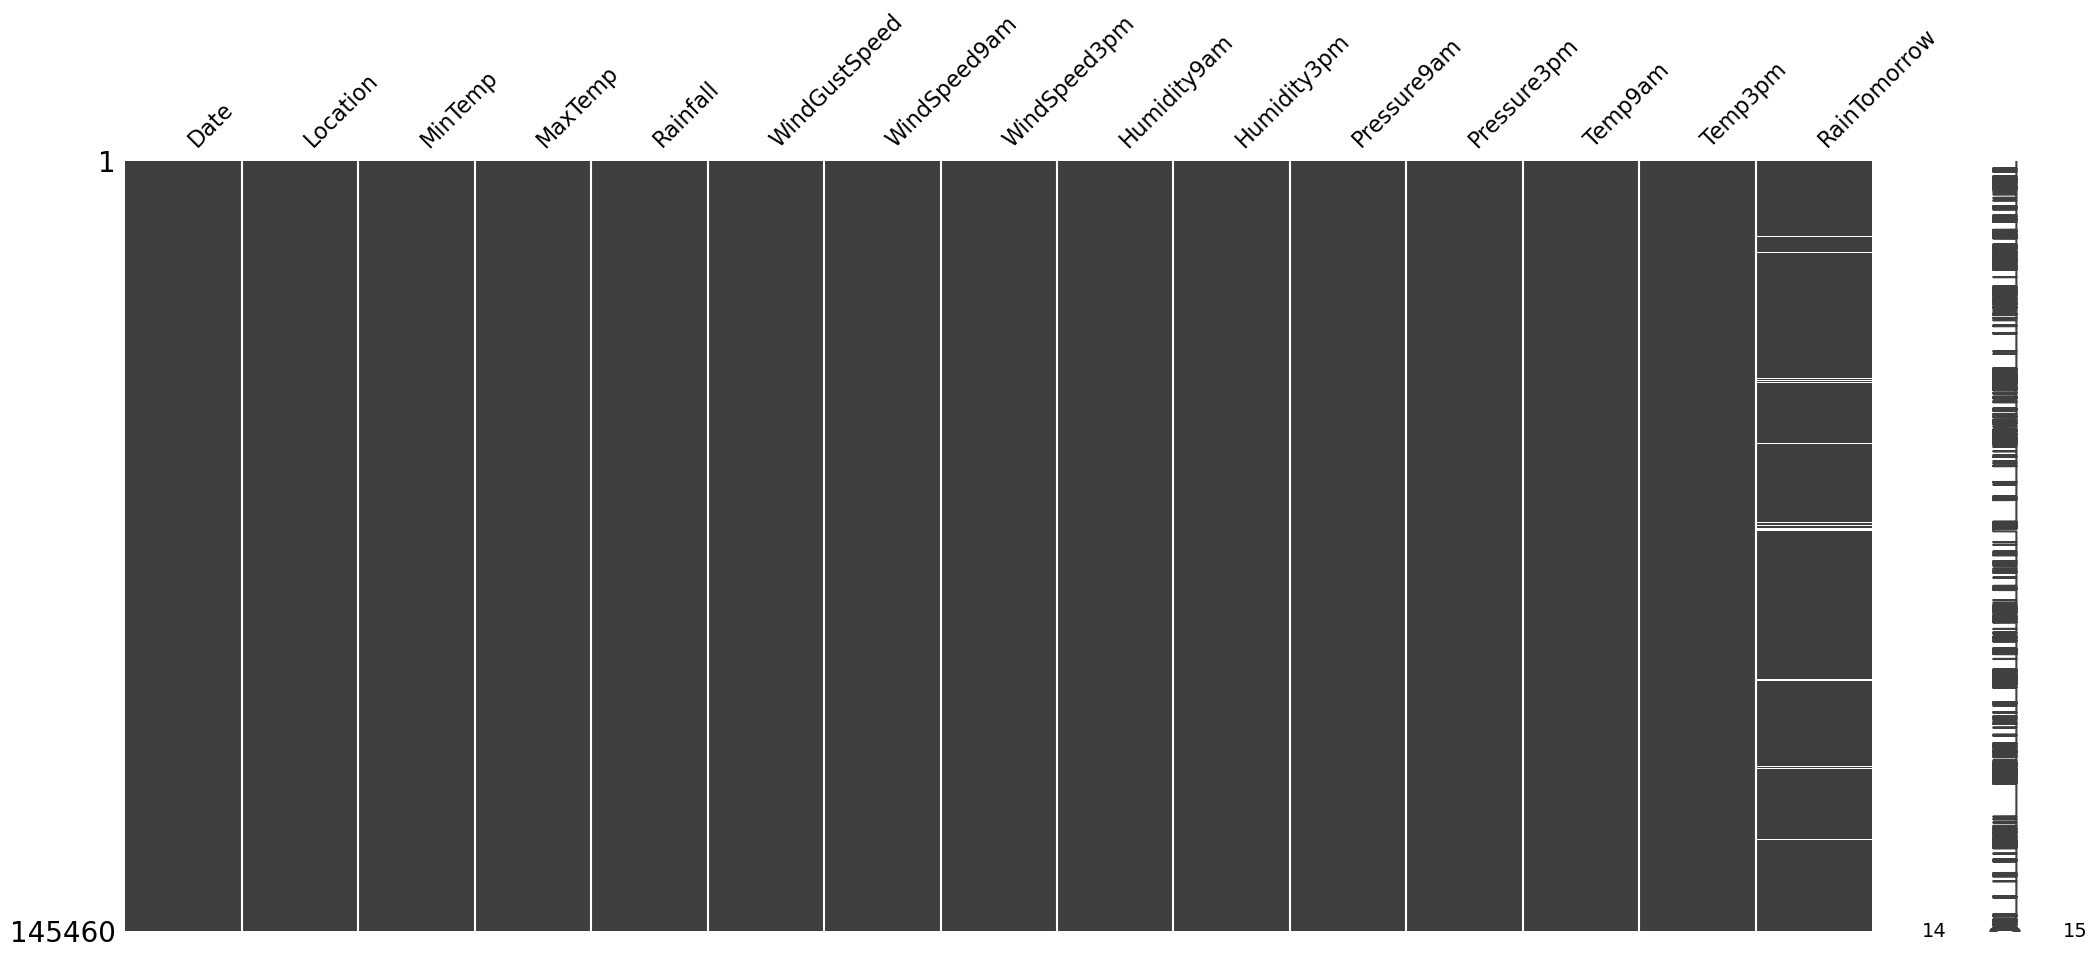

In [13]:
msno.matrix(data)

In [14]:
cat_names = cat_data.columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [15]:
cat_data = imputer.fit_transform(cat_data)
#converting the array to dataframe
cat_data = pd.DataFrame(cat_data, columns = cat_names)

In [16]:
data = pd.concat([data,cat_data], axis = 1)
data = data.dropna(subset = ['RainTomorrow'])

<Axes: >

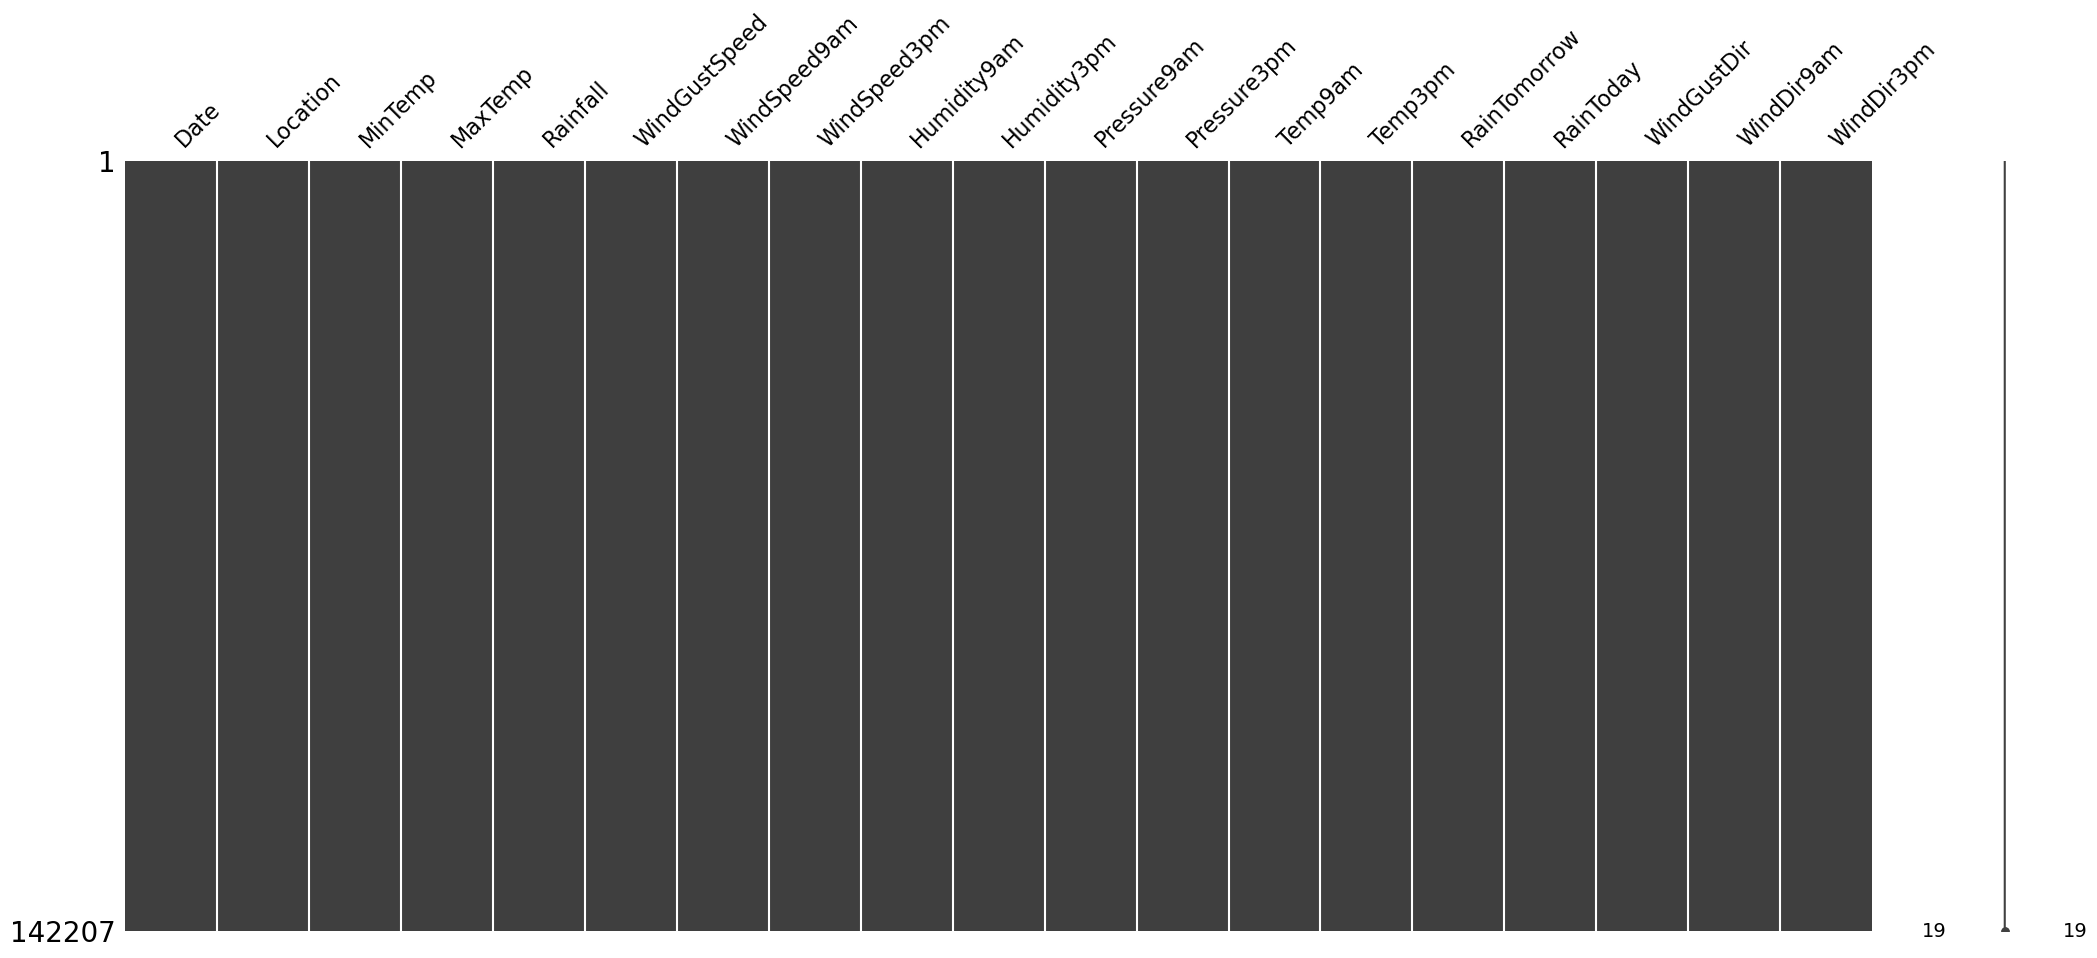

In [17]:
msno.matrix(data)

In [18]:
data['Date'] = pd.to_datetime(data['Date'])
cor = data.select_dtypes(include=['number']).corr()

In [19]:
data.select_dtypes(include=['number']).corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.733920  0.103311       0.173352      0.174946   
MaxTemp        0.733920  1.000000 -0.074205       0.066295      0.014585   
Rainfall       0.103311 -0.074205  1.000000       0.127263      0.085989   
WindGustSpeed  0.173352  0.066295  0.127263       1.000000      0.577772   
WindSpeed9am   0.174946  0.014585  0.085989       0.577772      1.000000   
WindSpeed3pm   0.174141  0.050359  0.056772       0.658304      0.513060   
Humidity9am   -0.232393 -0.499778  0.221393      -0.209222     -0.269024   
Humidity3pm    0.005899 -0.499716  0.249621      -0.025750     -0.030988   
Pressure9am   -0.424289 -0.309054 -0.159675      -0.426578     -0.215140   
Pressure3pm   -0.433985 -0.397399 -0.120365      -0.384614     -0.165024   
Temp9am        0.898004  0.880076  0.011387       0.146755      0.128776   
Temp3pm        0.699847  0.969724 -0.077556       0.032244      0.005028   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.174141    -0.232393     0.005899    -0.424289   
MaxTemp            0.050359    -0.499778    -0.499716    -0.309054   
Rainfall           0.056772     0.221393     0.249621    -0.159675   
WindGustSpeed      0.658304    -0.209222    -0.025750    -0.426578   
WindSpeed9am       0.513060    -0.269024    -0.030988    -0.215140   
WindSpeed3pm       1.000000    -0.144264     0.015792    -0.277485   
Humidity9am       -0.144264     1.000000     0.659864     0.131588   
Humidity3pm        0.015792     0.659864     1.000000    -0.025782   
Pressure9am       -0.277485     0.131588    -0.025782     1.000000   
Pressure3pm       -0.239745     0.176157     0.048550     0.959872   
Temp9am            0.162112    -0.471141    -0.217586    -0.397714   
Temp3pm            0.028418    -0.492438    -0.555783    -0.266258   

               Pressure3pm   Temp9am   Temp3pm  
MinTemp          -0.433985  0.898004  0.699847  
MaxTemp          -0.397399  0.880076  0.969724  
Rainfall         -0.120365  0.011387 -0.077556  
WindGustSpeed    -0.384614  0.146755  0.032244  
WindSpeed9am     -0.165024  0.128776  0.005028  
WindSpeed3pm     -0.239745  0.162112  0.028418  
Humidity9am       0.176157 -0.471141 -0.492438  
Humidity3pm       0.048550 -0.217586 -0.555783  
Pressure9am       0.959872 -0.397714 -0.266258  
Pressure3pm       1.000000 -0.442108 -0.361276  
Temp9am          -0.442108  1.000000  0.846929  
Temp3pm          -0.361276  0.846929  1.000000

<Axes: >

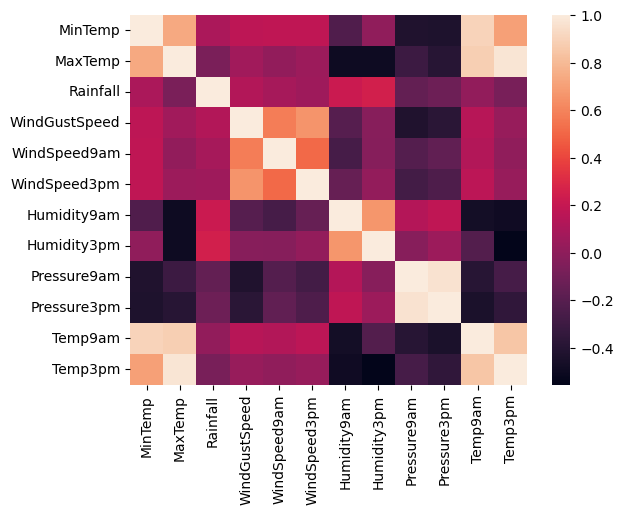

In [20]:
sns.heatmap(data = cor, xticklabels = cor.columns.values, yticklabels = cor.columns.values)

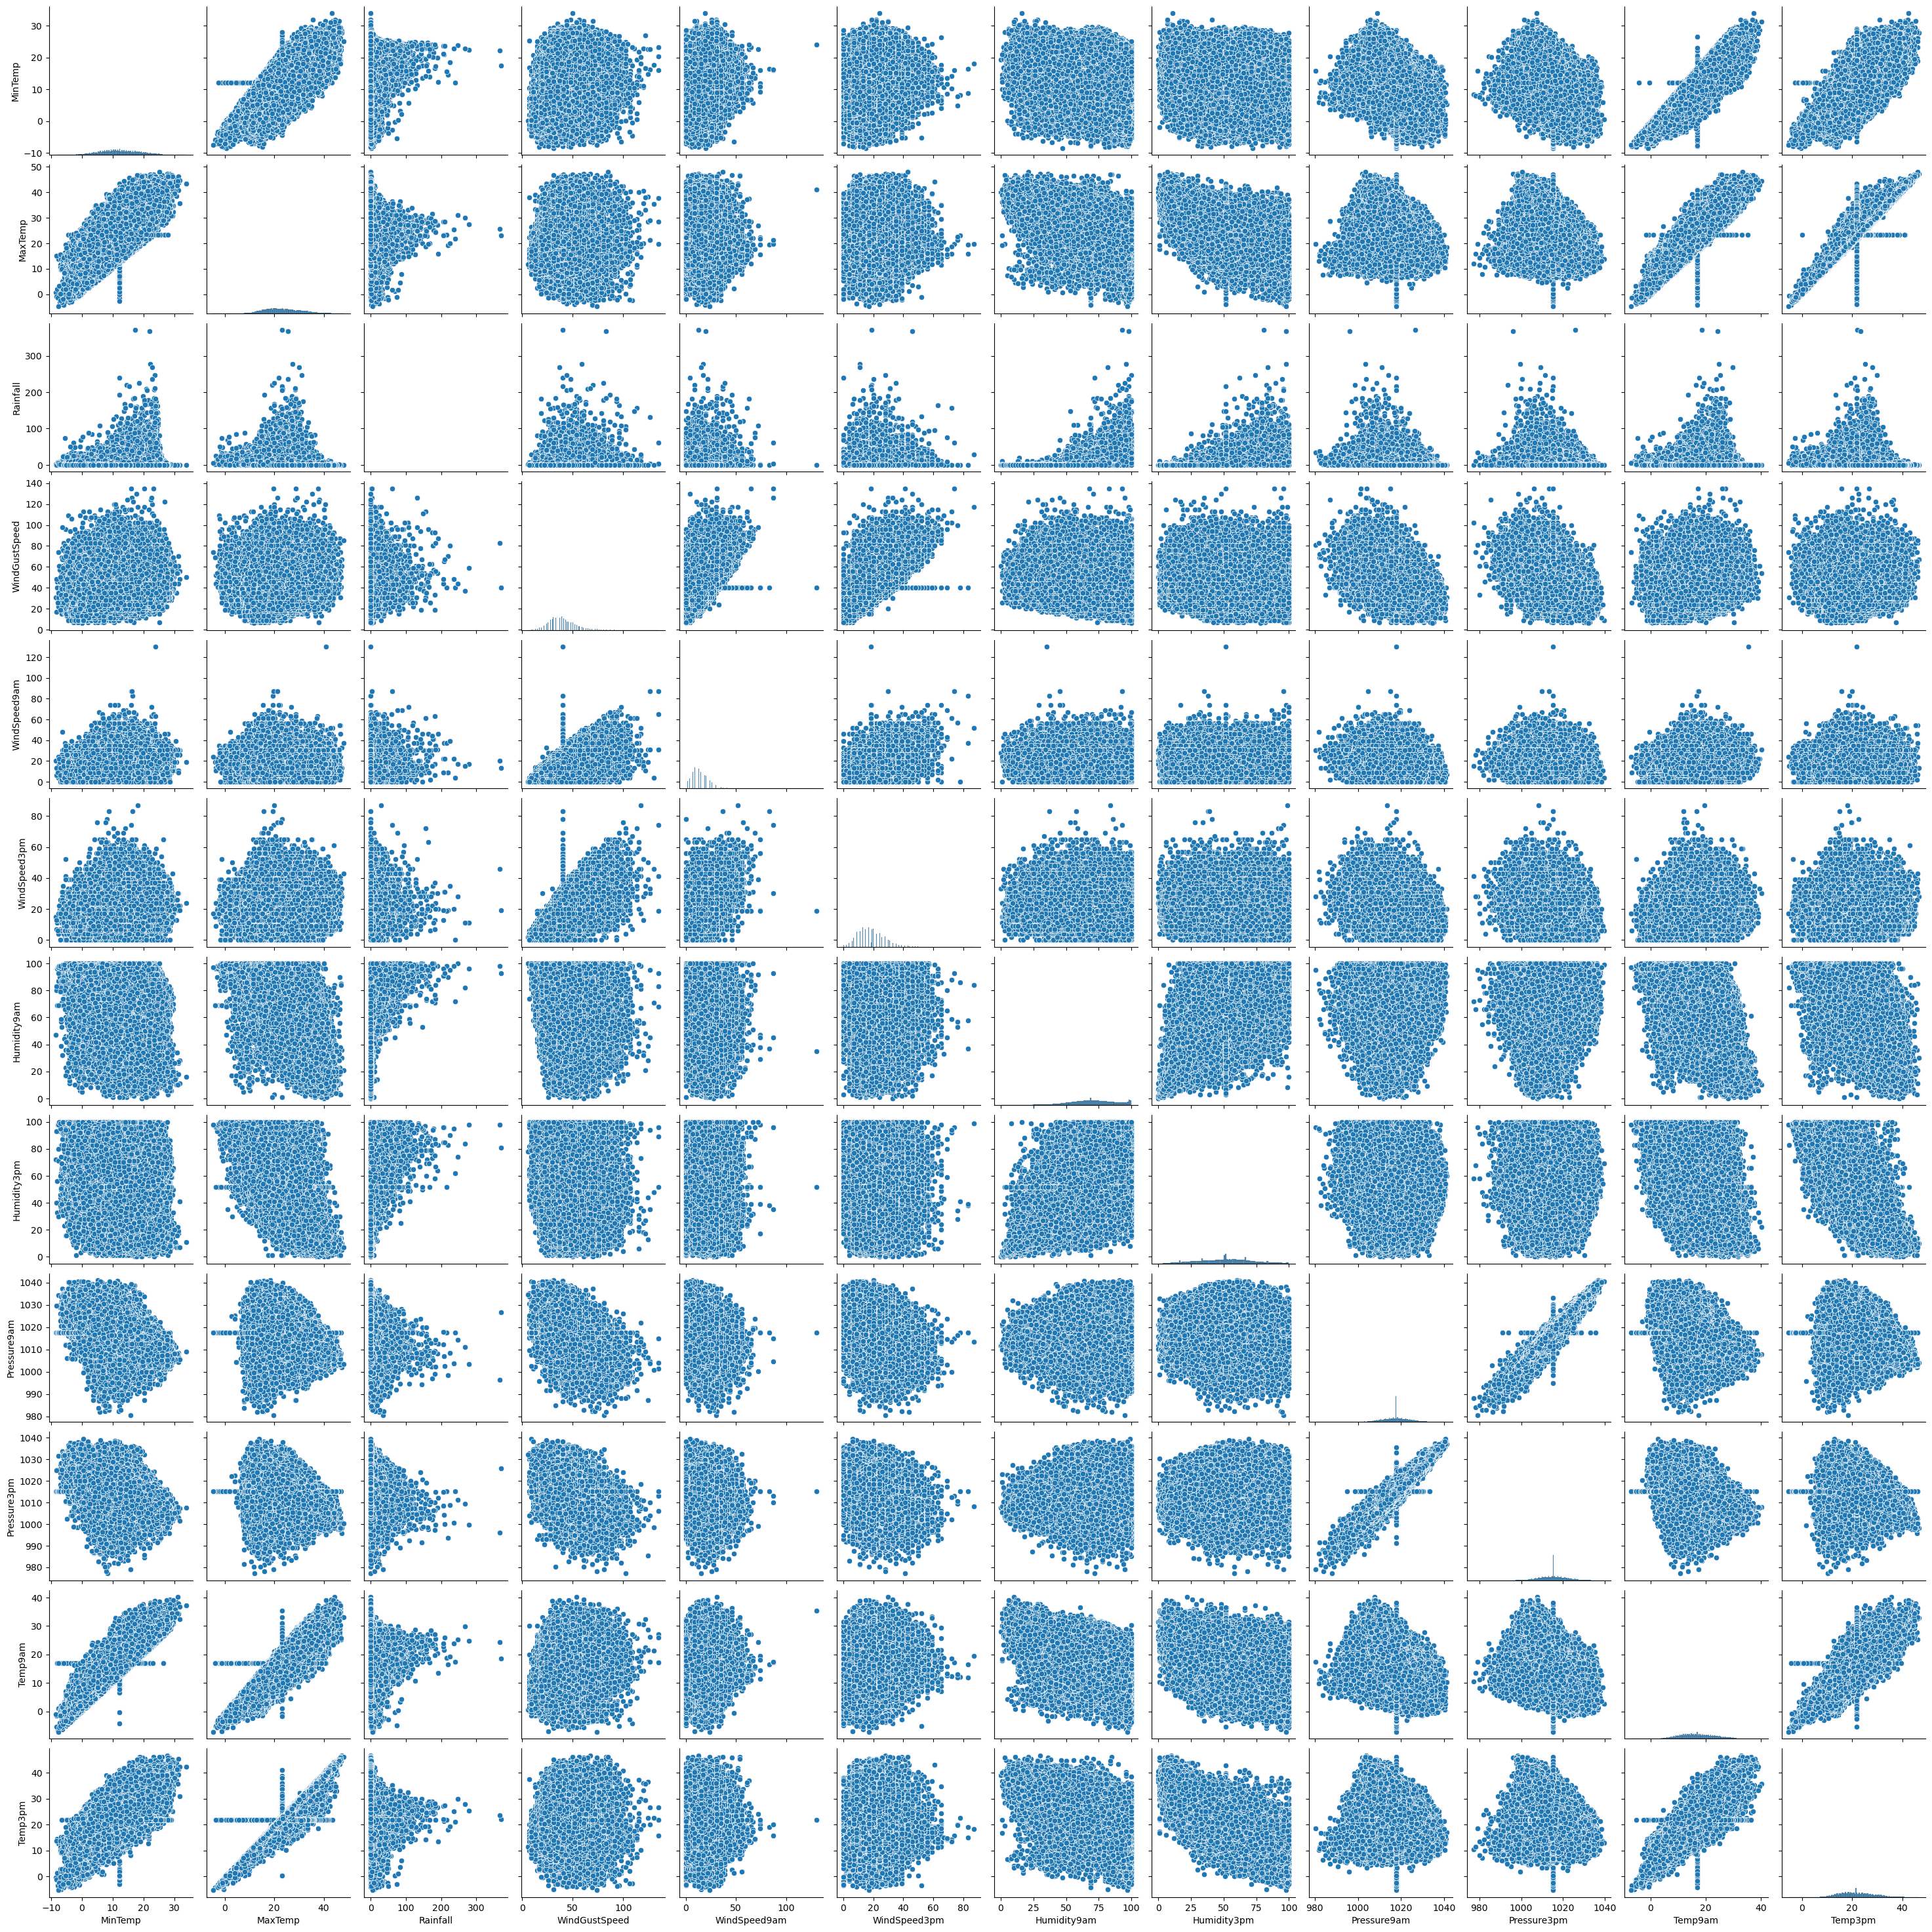

In [21]:
numeric_data = data.select_dtypes(include=['number'])
sns.pairplot(numeric_data)

<Axes: >

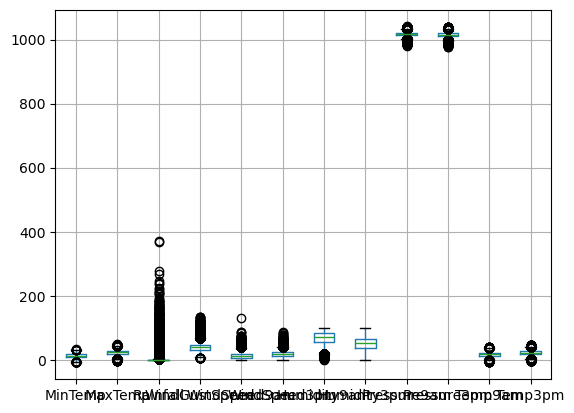

In [22]:
numeric_data.boxplot()

In [23]:
y = data['RainTomorrow']
x = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm']]

In [24]:
names = x.columns

In [25]:
names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
       'WindSpeed9am', 'WindSpeed3pm'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
x = x.select_dtypes(include=['number'])
sc = StandardScaler()
x_scale = sc.fit_transform(x)

In [27]:
x = pd.DataFrame(x,columns = names)

In [28]:
from sklearn import model_selection

In [29]:
y = y.astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(np.unique(y))

[0 1]


In [40]:
print("Encoded:", y)
y_decoded = le.inverse_transform(y)
print("Decoded labels:", y_decoded)
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_scale,y,test_size = 0.2, random_state = 0)

Encoded: [0 0 0 ... 0 0 0]
Decoded labels: ['No' 'No' 'No' ... 'No' 'No' 'No']


In [41]:
import sklearn

In [42]:
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
log = sklearn.linear_model.LogisticRegression()

In [43]:
# XGBoost.fit(x_train,y_train)
# p1 = XGBoost.predict(x_test)
# print("XGBoost:",metrics.accuracy_score(y_test,p1))
# accuracy score: XGBoost: 0.8347162646789958

In [44]:
Rand_forest.fit(x_train,y_train)
p2 = Rand_forest.predict(x_test)
print("Random Forest:",metrics.accuracy_score(y_test,p2))

Random Forest: 0.8374235285844878


In [45]:
# svm.fit(x_train,y_train)
# p3 = svm.predict(x_test)
# print("SVM:",metrics.accuracy_score(y_test,p3))
# accuracy score: SVM: 0.8335911679909992

In [46]:
# Dtree.fit(x_train,y_train)
# p4 = Dtree.predict(x_test)
# print("Dtree:",metrics.accuracy_score(y_test,p4))
# accuracy score: Dtree: 0.7513184726812461

In [47]:
# log.fit(x_train,y_train)
# p5 = log.predict(x_test)
# print("log:",metrics.accuracy_score(y_test,p5))
# accuracy score: log: 0.8275789325645173

In [48]:
conf_matrix = metrics.confusion_matrix(y_test,p2)

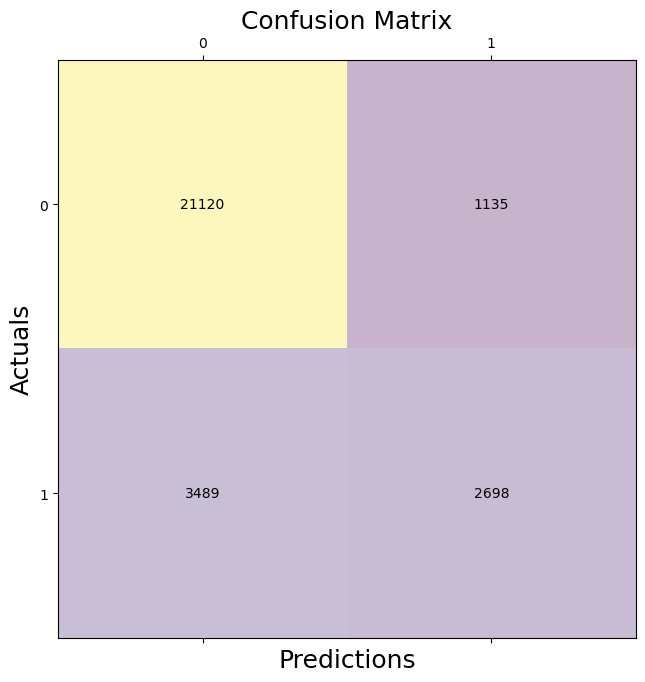

In [49]:
fig,ax = plt.subplots(figsize = (7.5,7.5))
ax.matshow(conf_matrix,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,p2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22255
           1       0.70      0.44      0.54      6187

    accuracy                           0.84     28442
   macro avg       0.78      0.69      0.72     28442
weighted avg       0.82      0.84      0.82     28442



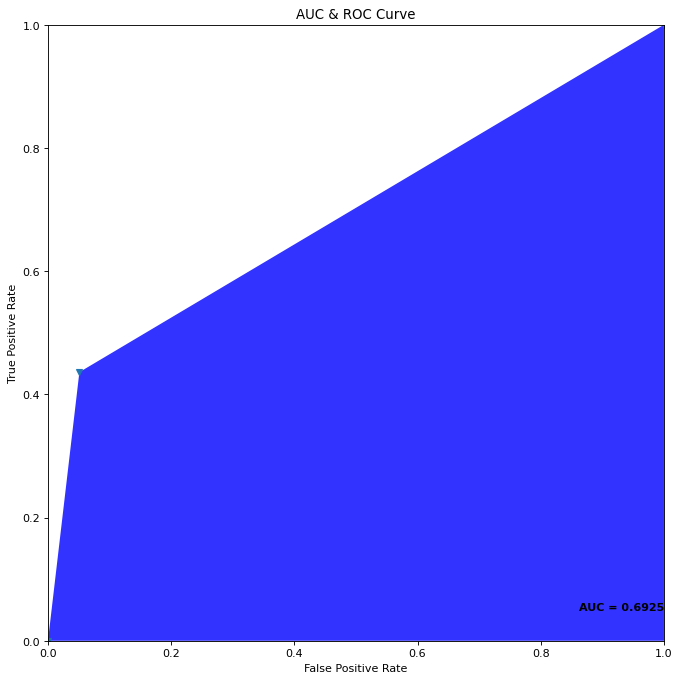

In [52]:
auc = metrics.roc_auc_score(y_test,p2)
fpr, tpr, thresholds = metrics.roc_curve(y_test,p2)
plt.figure(figsize=(12,10), dpi = 80)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(fpr,tpr,'v')
plt.fill_between(fpr,tpr,facecolor='blue',alpha=0.8)
plt.text(1,0.05,"AUC = %0.4f" %auc, ha = 'right', fontsize = 10, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [53]:
import pickle

In [55]:
pickle.dump(Rand_forest,open('rainfall.pkl','wb'))
pickle.dump(le,open('encoder.pkl','wb'))
pickle.dump(imputer,open('impter.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))